In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np

In [2]:
wd = '/Users/danielmsheehan/general_assembly/github/projects/project_6/capstone/data/'

df = pd.read_csv(f"{wd}/processing/eia_agg_viirs.csv")

#df = df.replace(999999, np.nan)
df.head(3)

,region,month_yyyymm,oil_bbl_d_total_production,rig_count,index_right,date_mscan_yyyymm,count_obs,temp_bb_mean,temp_bb_med,temp_bb_sum,temp_bb_min,temp_bb_max
0,Anadarko Region,2007-01,126398.038,176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Anadarko Region,2007-02,134177.221,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Anadarko Region,2007-03,137515.513,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.loc[df['index_right'].notnull()]

In [4]:
df.columns

Index(['region', 'month_yyyymm', 'oil_bbl_d_total_production', 'rig_count',
       'index_right', 'date_mscan_yyyymm', 'count_obs', 'temp_bb_mean',
       'temp_bb_med', 'temp_bb_sum', 'temp_bb_min', 'temp_bb_max'],
      dtype='object')

In [5]:
df.head(5)

,region,month_yyyymm,oil_bbl_d_total_production,rig_count,index_right,date_mscan_yyyymm,count_obs,temp_bb_mean,temp_bb_med,temp_bb_sum,temp_bb_min,temp_bb_max
131,Anadarko Region,2017-12,472219.794,118.0,Anadarko Region,2017-12,296.0,406453.121622,2039.0,120310124.0,800.0,999999.0
132,Anadarko Region,2018-01,510484.664,116.0,Anadarko Region,2018-01,466.0,410899.948498,2016.0,191479376.0,789.0,999999.0
133,Anadarko Region,2018-02,516729.421,120.0,Anadarko Region,2018-02,276.0,363413.507246,1964.5,100302128.0,729.0,999999.0
134,Anadarko Region,2018-03,540726.461,122.0,Anadarko Region,2018-03,386.0,425802.968912,2003.5,164359946.0,822.0,999999.0
135,Anadarko Region,2018-04,510012.735,126.0,Anadarko Region,2018-04,482.0,330788.970954,1800.5,159440284.0,843.0,999999.0


In [46]:
df['region'].value_counts()

Niobrara Region       27
Appalachia Region     27
Anadarko Region       27
Eagle Ford Region     27
Permian Region        27
Haynesville Region    27
Bakken Region         27
Name: region, dtype: int64

In [112]:
X = df.drop(columns=[
    # 'region', 
    'month_yyyymm', 
    'rig_count', 
    'index_right', 
    'date_mscan_yyyymm',
    'oil_bbl_d_total_production',
    'temp_bb_max',
    'temp_bb_mean',
    'temp_bb_med', 
    'temp_bb_sum', 
    'temp_bb_min', 
])

X = df[['count_obs',  'temp_bb_max',
    'temp_bb_mean',
    'temp_bb_med', 
    'temp_bb_sum', 
    'temp_bb_min', ]]

X = pd.get_dummies(X)

y = df['oil_bbl_d_total_production']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.30)

In [113]:
X

,count_obs,temp_bb_max,temp_bb_mean,temp_bb_med,temp_bb_sum,temp_bb_min
131,296.0,999999.0,406453.121622,2039.0,1.203101e+08,800.0
132,466.0,999999.0,410899.948498,2016.0,1.914794e+08,789.0
133,276.0,999999.0,363413.507246,1964.5,1.003021e+08,729.0
134,386.0,999999.0,425802.968912,2003.5,1.643599e+08,822.0
135,482.0,999999.0,330788.970954,1800.5,1.594403e+08,843.0
...,...,...,...,...,...,...
1107,9827.0,999999.0,239137.155490,1908.0,2.350001e+09,883.0
1108,9285.0,999999.0,257075.384060,1928.0,2.386945e+09,737.0
1109,10061.0,999999.0,242248.776961,1914.0,2.437265e+09,784.0
1110,8973.0,999999.0,215660.884097,1898.0,1.935125e+09,871.0


In [114]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
model.score(X_train, y_train)

0.7956163386442765

In [116]:
model.score(X_test, y_test)

0.7276528298759912

In [117]:
cross_val_score(model, X_test, y_test, cv=5).mean()

0.26806019874097115

In [118]:
regressor = RandomForestRegressor(random_state=42)

regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [119]:
regressor.score(X_train, y_train)

0.9858670146225844

In [120]:
regressor.score(X_test, y_test)

0.9474303206747475

In [121]:
cross_val_score(regressor, X, y, cv=4)

array([ -1.05774145, -15.21916061,   0.56855085,  -0.52499087])

In [122]:
X_train.shape

(132, 6)

In [123]:
X_test.shape

(57, 6)

In [133]:
extratrees = ExtraTreesRegressor(random_state=42, n_estimators=500)

extratrees.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=500, n_jobs=None, oob_score=False,
                    random_state=42, verbose=0, warm_start=False)

In [134]:
extratrees.score(X_train, y_train)

0.9999999997138689

In [135]:
extratrees.score(X_test, y_test)

0.9018247658181916

In [136]:
cross_val_score(extratrees, X_test, y_test, cv=5)

array([ 0.82406292, -0.23706277,  0.89651856,  0.96858972,  0.76518445])

In [137]:
important_features = pd.Series(data=extratrees.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)

important_features

count_obs       0.379128
temp_bb_sum     0.279988
temp_bb_med     0.159827
temp_bb_mean    0.110098
temp_bb_min     0.070959
temp_bb_max     0.000000
dtype: float64

In [138]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns

{'Anadarko Region': (0.4, 0.7607843137254902, 0.6470588235294118), 'Appalachia Region': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961), 'Bakken Region': (0.5529411764705883, 0.6274509803921569, 0.796078431372549), 'Eagle Ford Region': (0.9058823529411765, 0.5411764705882353, 0.7647058823529411), 'Haynesville Region': (0.6509803921568628, 0.8470588235294118, 0.32941176470588235), 'Niobrara Region': (1.0, 0.8509803921568627, 0.1843137254901961), 'Permian Region': (0.8980392156862745, 0.7686274509803922, 0.5803921568627451)}


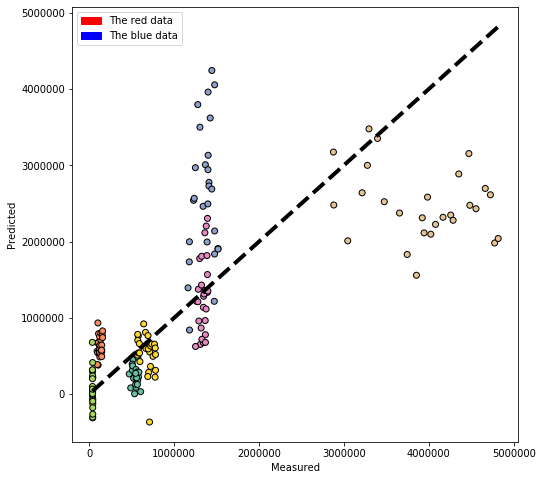

In [139]:
import matplotlib.patches as mpatches


predicted = cross_val_predict(model, X, y, cv=10)

color_labels = df['region'].unique()

# List of RGB triplets
rgb_values = sns.color_palette("Set2", 8)

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

print(color_map)

plt.figure(figsize=(8, 8))
# fig, ax = plt.subplots()
plt.scatter(y, predicted, edgecolors=(0, 0, 0), c=df['region'].map(color_map))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
#ax.set_xlabel('Measured')
#ax.set_ylabel('Predicted')
#plt.legend()

plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.legend(handles=[
    mpatches.Patch(color='red', label='The red data'),
    mpatches.Patch(color='blue', label='The blue data')
])

plt.show()

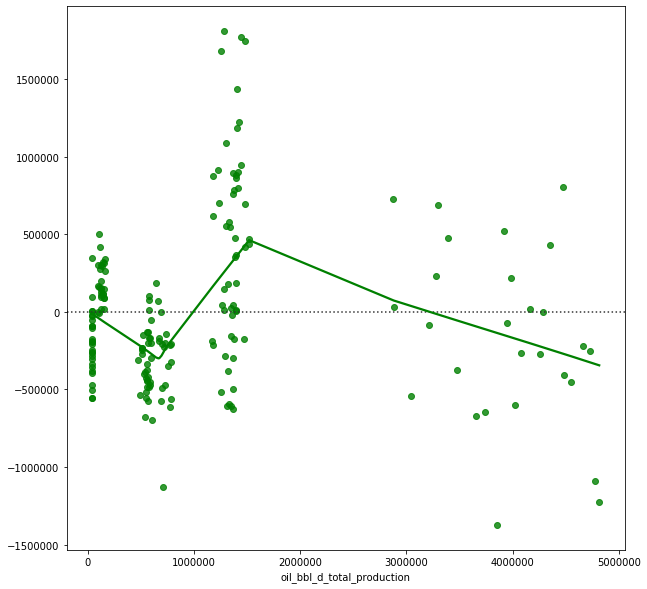

In [140]:
y_pred = model.predict(X)

color_labels = df['region'].unique()

# List of RGB triplets
rgb_values = sns.color_palette("Set2", 8)

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))
plt.figure(figsize=(10, 10))
#plt.colorbar()

sns.residplot(y, y_pred, lowess=True, color="g")#, color=df['region'].map(color_map))

In [141]:
resids = y - predicted

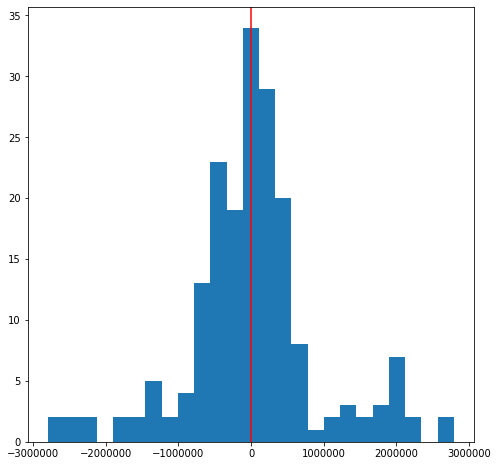

In [142]:
# Normality of residuals assumption
plt.figure(figsize=(8, 8))

plt.hist(resids, bins=25);
plt.axvline(0, color='red')

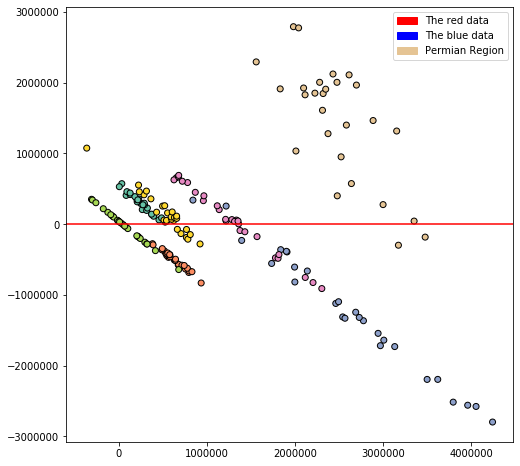

In [143]:
import matplotlib.patches as mpatches

plt.figure(figsize=(8, 8))

plt.scatter(predicted, resids, edgecolors='black', c=df['region'].map(color_map))

#legend_elements = [Patch(facecolor='orange', edgecolor='r', label='Color Patch')]
plt.legend(handles=[
    mpatches.Patch(color='red', label='The red data'),
    mpatches.Patch(color='blue', label='The blue data'),
    mpatches.Patch(color=(0.8980392156862745,0.7686274509803922,0.5803921568627451), label='Permian Region'),
])
plt.axhline(0, color='red');